In [2]:
import pandas as pd
import numpy as np

In [3]:
dataset = pd.read_csv('exam-2018-09-04/weather.csv', sep=';')

## Dataset analysis

In [4]:
dataset.head()

,Month,Location,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,1,Albury,20.4,37.6,0.0,54,0,7,46,17,1013.4,1009.2,3,26.1,36.7,No,No
1,1,Albury,20.9,33.6,0.4,50,9,17,54,30,1011.1,1008.4,8,24.8,31.7,No,Yes
2,1,Albury,18.4,23.1,2.2,48,11,39,62,67,1014.0,1014.8,8,21.8,19.5,Yes,Yes
3,1,Albury,17.3,23.7,15.6,39,9,17,74,65,1017.9,1016.5,8,19.2,21.6,Yes,Yes
4,1,Albury,15.5,22.9,6.8,31,6,9,92,63,1016.3,1013.9,8,17.2,22.2,Yes,No


- distribuzione dei valori (std)

In [20]:
dataset.describe()

,Month,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud3pm,Temp9am,Temp3pm
count,14468.000000,14468.000000,14468.000000,14468.000000,14468.000000,14468.000000,14468.000000,14468.000000,14468.000000,14468.000000,14468.000000,14468.000000,14468.000000,14468.000000
mean,6.482168,12.571793,23.402924,2.341492,40.375242,14.463437,19.146254,68.868745,51.949336,1016.854140,1014.381089,2.443945,17.261114,21.876265
std,3.404448,6.231579,7.084502,8.091881,13.755842,8.628992,8.653345,18.629859,20.596100,7.053964,10.908566,3.608546,6.392711,6.931246
min,1.000000,-5.500000,4.600000,0.000000,9.000000,0.000000,0.000000,4.000000,3.000000,982.000000,-1.000000,-1.000000,-1.100000,1.700000
25%,4.000000,7.900000,17.700000,0.000000,31.000000,9.000000,13.000000,57.000000,37.000000,1012.600000,1010.000000,-1.000000,12.300000,16.400000
50%,6.000000,12.200000,22.900000,0.000000,39.000000,13.000000,19.000000,70.000000,53.000000,1017.000000,1014.700000,1.000000,16.800000,21.300000
75%,9.000000,17.100000,28.600000,1.000000,48.000000,20.000000,24.000000,83.000000,66.000000,1021.300000,1018.925000,7.000000,21.900000,26.800000
max,12.000000,29.200000,45.100000,225.000000,120.000000,65.000000,65.000000,100.000000,100.000000,1040.300000,1036.400000,8.000000,36.200000,43.500000


 - valori nulli per colonna

In [21]:
dataset.isnull().any()

Month            False
Location         False
MinTemp          False
MaxTemp          False
Rainfall         False
WindGustSpeed    False
WindSpeed9am     False
WindSpeed3pm     False
Humidity9am      False
Humidity3pm      False
Pressure9am      False
Pressure3pm      False
Cloud3pm         False
Temp9am          False
Temp3pm          False
RainToday        False
RainTomorrow     False
dtype: bool

 - il dataset è bilanciato per colonna 'col'

In [22]:
dataset.groupby(['RainToday']).size()

RainToday
No     11023
Yes     3445
dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f0427277a90>,
      dtype=object)

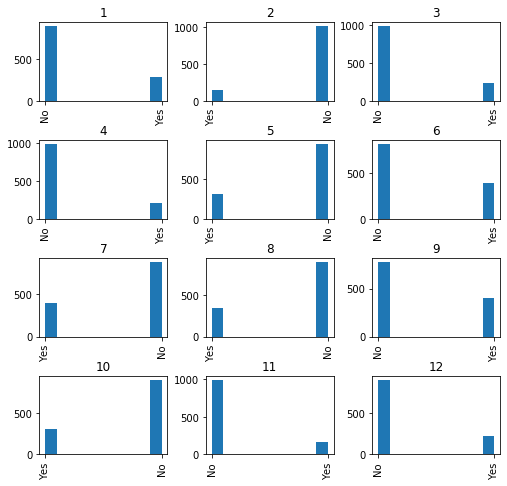

In [23]:
dataset['RainToday'].hist(by=dataset['Month'], figsize=(8, 8))

## Trasformazione e Predizione

In [ ]:
# Copia di un dataset
datasetcp = dataset.copy(deep=True)
# Eliminazione di colonne
datasetwo = dataset.drop(columns=['MaxTemp', 'WindGustSpeed'])
# Righe nulle per colonna / righe non nulle per colonna
dataset.loc[dataset['Rainfall'].isnull()]
dataset.loc[dataset['Rainfall'].notnull()]
# Sostituzione dei valori di una colonna
dataset.loc[dataset['Rainfall'] == 0, 'Rainfall'] = 0

In [ ]:
# Split del dataset in dimensioni arbitrarie con shuffle delle righe
split_index = np.random.permutation(len(dataset.index))
row_boundary = int(3/4 * len(dataset.index))

d1 = dataset.loc[split_index[:row_boundary]]
d2 = dataset.loc[split_index[row_boundary:]]

In [ ]:
# Split del dataset in automatico

from sklearn.model_selection import train_test_split

X = dataset.loc[:, dataset.columns != 'RainTomorrow']
y = dataset.loc[:, dataset.columns == 'RainTomorrow']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_split=0.8, test_split=0.2)

 - tipicamente per classificatori ad albero non c'è bisogno di effettuare scaling o normalizzazione
 - per i classificatori *non ad albero* i passi consigliati sono
     1. utilizzo di MinMaxScaler
     2. utilizzo di StandardScaler

In [ ]:
# Categorizzazione in valori booleani delle colonne

month_dummies = pd.get_dummies(dataset['Month'], prefix='Month')
dataset_disc_months = dataset.join(month_dummies)

In [ ]:
# Normalizzazione

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Se ci sono molti outlier utilizzo di RobustScaler

from sklearn.preprocessing import RobustScaler

transformer = RobustScaler()
transformer.fit(X_train)
X_train_scaled = transformer.transform(X_train)
X_test_scaled = transformer.trasnform(X_test)

# Scaling all'interno di un intervallo

from sklearn.preprocessing import MinMaxScaler

minmaxscaler = MinMaxScaler()
minmaxscaler.fit(X_train)
X_train_min_max = minmaxscaler.transform(X_train)
X_test_min_max = minmaxscaler.transform(X_test)

# Normalizing

from sklearn.preprocessing import Normalizer

normalizer = Normalizer()
normalizer.fit(X_train)
X_train_normalized = normalizer.transform(X_train)
X_test_normalized = normalizer.transform(X_test)

In [ ]:
# Utilizzo di modelli per classification/prediction

from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)

# K-Fold cross validation

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

cv = KFold(n_splits=10)
model = LogisticRegression()
score = cross_val_score(model, X, y, cv=cv)

In [1]:
# Valutazione

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

accuracy = accuracy_score(y_test, y_pred)
print(confusion_matrix(y_test, y_pred))
classification_report(y_test, y_pred)

In [ ]:
# Utilizzo di pipelines

from sklearn.pipeline import Pipeline

preprocessing_pipeline = Pipeline(steps=[('min_max', MinMaxScaler()),
                                        'normalizer', Normalizer()])
model_pipeline = Pipeline(steps=[('model', LogisticRegression())])
pipeline = Pipeline(steps=[('preprocessing', preprocessing_pipeline),
                          'model', model_pipeline])
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)

In [ ]:
# GridSearch

# TODO

Month               AxesSubplot(0.125,0.536818;0.0945122x0.343182)
MinTemp          AxesSubplot(0.238415,0.536818;0.0945122x0.343182)
MaxTemp          AxesSubplot(0.351829,0.536818;0.0945122x0.343182)
Rainfall         AxesSubplot(0.465244,0.536818;0.0945122x0.343182)
WindGustSpeed    AxesSubplot(0.578659,0.536818;0.0945122x0.343182)
WindSpeed9am     AxesSubplot(0.692073,0.536818;0.0945122x0.343182)
WindSpeed3pm     AxesSubplot(0.805488,0.536818;0.0945122x0.343182)
Humidity9am            AxesSubplot(0.125,0.125;0.0945122x0.343182)
Humidity3pm         AxesSubplot(0.238415,0.125;0.0945122x0.343182)
Pressure9am         AxesSubplot(0.351829,0.125;0.0945122x0.343182)
Pressure3pm         AxesSubplot(0.465244,0.125;0.0945122x0.343182)
Cloud3pm            AxesSubplot(0.578659,0.125;0.0945122x0.343182)
Temp9am             AxesSubplot(0.692073,0.125;0.0945122x0.343182)
Temp3pm             AxesSubplot(0.805488,0.125;0.0945122x0.343182)
dtype: object

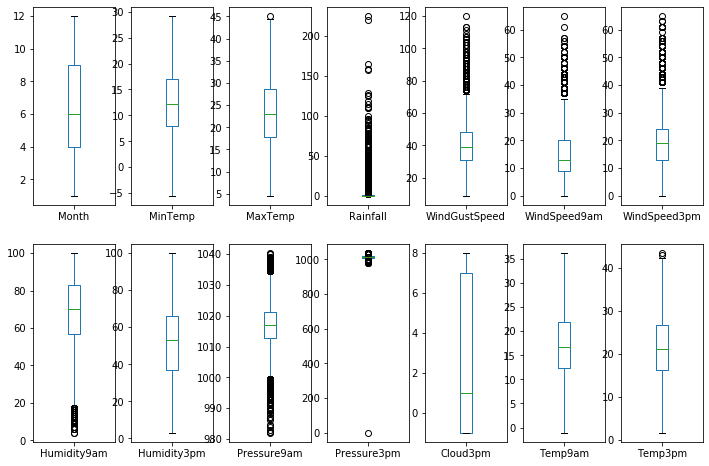

In [8]:
# Plotting data

# TODO

# Valuta la distribuzione delle feature
dataset.plot(kind='box', subplots=True, layout=(2, 7), figsize=(12, 8))